# Unsupervised Learning 

<p>In supervised Learning , we know the answer(target/label) when we train a model  whereas in unsupervised learning ,we explore the structure of our data to get the meaningful information without knowing the target or output variable in the dataset. A dataset for unsupervised learning doesnot have any output values.</p>
<p>The major challenge in unsupervised learning is that we dont actually have any output or target or label values in the dataset, therefore it is very hard to determine if the model for unsupervised learning is the right one.</p>
<p>Clustering is a technique that allows us to find groups that are more related to eachother than to objects in other groups. Remember in supervised learning classification dataset , we did have classes which actually separates datapoint from one another.However in unsupervised clustering technique we do not have any class values to separate the datapoints. So clustering help us to group those datapoint that are very much similar in properties. The goal is to split the data in such a way that the  datapoints within a single cluster are very similar and datapoints in different clusters are different.</p>



# K- Means Clustering 

K-Means are one of the most widely used unsupervised ML algorithm in the industry to deal with the unlabeled dataset.K-means uses prototype-based clustering technique  in which a single cluster is assigned a centroid(average) of similar datapoints within a cluster(for continuous points)or mediod(a point within a cluster that minimizes distance to all other points that belongs to that cluster) in categorical feature dataset. However we have not yet been familiar with the categorical feature dataset , we will be learning about them in the next chapter(Feature Encoding).
![figure_3_1.png](images/figure_3_1.png)

In figure 3.1, we have grouped the datapoints consisting of two features feature 1 and feature 2 in three different clusters(inside the orange circle). We have three different centroid for three different clusters of datapoints.One of the drawback of K means algorithm  is that we need to specify the number of clusters (value of K) a priori. A wrong choice of K can result in poor performance of the model. Elbow and silhouette methods can help us to determine the optimal values for K which we would be learning in this chapter aswell.
K-Means Algorithm uses the following four steps to cluster the datapoints based on their feature similarities. 
- Randomly pick any  of the datapoints as centroids for the clusters.
- Assign each datapoint to its nearest centroids.
- Now try to find the new centroid for each cluster such that the centroid is in the center of the cluster .
- Now repeat above two steps until the centroid assignment doesnot changes .

The above given algorithm steps is humanely impossible to do with pen and paper(with large datapoints) but however we are going to use scikit learn framework for implementing above algorithm.


The another question that arises , how we can measure the similarity between the two datapoints so that we can assign a datapoint to a centroid. We bascially measure the distance between a datapoint and the centroid in question which is also known as Euclidean distance. The Euclidean distance between two datapoints $P(x_1,y_1)$  and $Q(x_2,y_2)$ in a 2 -dimensional space is given as (two vectors $p=[x_1,y_1]$ and $q =[x_2,y_2]$) :

$$ d(p,q)= \sqrt {(x_1-x_2)^2 +(y_1-y_2)^2} $$

Similary Euclidean distance between two datapoints $P(x_1,y_1,z_1)$  and $Q(x_2,y_2,z_1)$ in a  3-dimensional space is given as :

$$ d(p,q)= \sqrt {(x_1-x_2)^2 + (y_1-y_2)^2 + (z_1-z_2)^2 } $$

For m -dimensional space and points  Euclidean distance is given as 
$$ d(p,q)= \sqrt{\sum_{i=0}^{m}(p_{i}-q_{i})^2 } = ||p-q||_2$$ 

The equation 3 can be squared on the both sides and thus it is known as <b>Squared Euclidean distance </b> given as 
$$ d^2(p,q)= \sum_{i=0}^{m}(p_{i}-q_{i})^2 =||p-q||^2_2 $$. $||p-q||^2_2$ is  known as squared L2 normalization.

Based on the euclidean distance metric we can actually , we can actually derive a way to minimize the cluster sum of squared  errors(<b>SSE</b>) or also known as cluster inertia and given as:
$$ SSE = \sum_{i=1}^n \sum_{j=1}^k w^{(i,j)} ||p^{(i)}-q^{(j)}||^2_2 $$

Here $i$ refers to the index of datapoints in the data set and $j$ refers to the cluster index . $q^{(j)}$ is the centroid point in test for cluster {j}. So it means we calculate the sse for each  data points through out the all the possible centroids and take the best centroid which results in the minimum SSE for that cluster.
Here,

\[ w^{(i,j)} =
  \begin{cases}
    1       & \quad \text{if } x^{(i)} \in  {j}\\
    0  & \quad  \text{ otherwise}
  \end{cases}
\]


In [1]:
%matplotlib inline 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris # import iris dataset from the sklearn library
from sklearn.cluster import KMeans 


We are going to  user iris dataset for unsupervised learning. However we are not going to take the target/label from the iris dataset since unsupervised learning doesnot need any target values. 

In [3]:
data=load_iris() # instantiate the class to an data object
X=data.data # these are the feature values 
y=data.target # This is the target/label/class values for iris dataset which won't be in use for unsupervised learning
              # However we are going to use target values to compare the results of unsupervised learning

Text(0, 0.5, 'Feature-3')

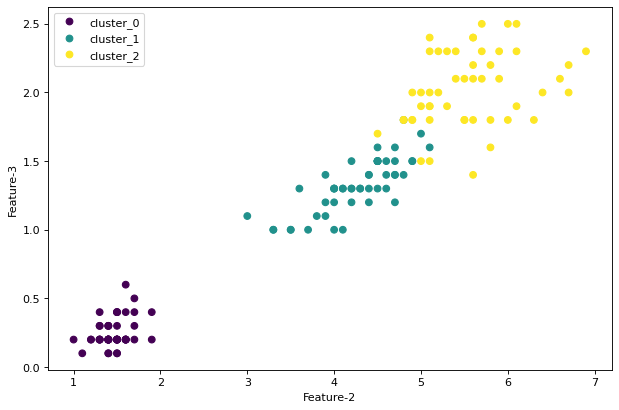

In [11]:
# Let us first plot the iris dataset along with target values and observe the scatter plot 
# please go to chapter 2  to oberserve the iris dataframe if you donot remember 
classes=["cluster_0","cluster_1","cluster_2"]
plt.figure(figsize=(20,6),dpi=80)
plt.subplot(121)
scatter_plt = plt.scatter(X[:,2],X[:,3],c=y) # Take two feature points(petal length and petal width) and plot in different colors according to classes(0 ,1 and 2)
                               # the reason we are taking only two features is that it is to observe in 2D. You may take 
                               # any two features  out of 4 features. Here "c" parameter uses colors for three differe classses(0,1,2) in y          
plt.legend(handles=scatter_plt.legend_elements()[0],labels=classes)                                  
plt.xlabel("Feature-2")
plt.ylabel("Feature-3")
plt.title("")

From above figure we can see that three clusters (since we have three different classes ) has been seperated in three different clusters. Howvever in unsupervised learning we do not have prior information about the number of clusters, so we need to train the algorithm to find the groups which are closely related . In the next example we are going to unsupervised learning on the iris dataset(without target values) and compare the result with the above figure .

In [12]:
kmeans=KMeans(n_clusters=3,random_state=42) # Instantiate the KMeans with number of clusters =3
kmeans.fit(X) 
y_pred=kmeans.predict(X)

In [13]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'Unsupervised Learning applied to Iris Dataset ')

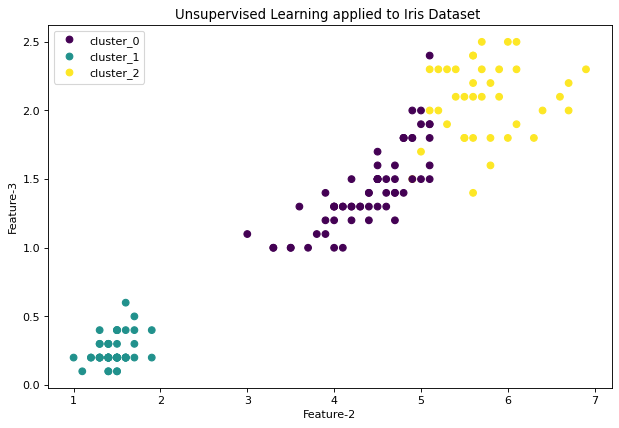

In [16]:
classes=["cluster_0","cluster_1","cluster_2",]
plt.figure(figsize=(20,6),dpi=80)
plt.subplot(121)
scatter_plt = plt.scatter(X[:,2],X[:,3],c=y_pred) # Take two feature points(petal length and petal width) and plot in different colors according to classes(0 ,1 and 2)
                               # the reason we are taking only two features is that it is to observe in 2D. You may take 
                               # any two features  out of 4 features.          
plt.legend(handles=scatter_plt.legend_elements()[0],labels=classes)                                  
plt.xlabel("Feature-2")
plt.ylabel("Feature-3")
plt.title("Unsupervised Learning applied to Iris Dataset ")

## Elbow Method:  Finding optimal Number of Clusters

The main challenge of unsupervised learning is that we do not have the prior truth class labels in our dataset and thus we do not know exactly the number of group/clusters that we might need to categorized our samples.However we have a graphical tool known as elbow method to estimate the optimal number of cluster "k" for a give dataset.In the example below we will try to predict the number of cluster and thus number of true classes of Iris dataset.

C:\Users\kumud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


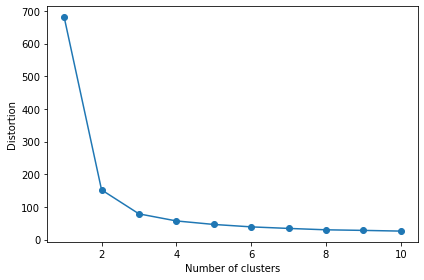

In [20]:
distortions = []  # Initialize the empty list  
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_) # append the distortion value return by ._intertia_ attribute to distortions list in every iteration
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

The idea behind the elbow method is to identify the value of K where the distortion begins to increase rapidly . From plot above (Start observation from higher K to lower K ), we can observe  that for K= [10,9,8,7,6,5,4,3] there is no higher increment in distortion. But after K=3 the distortion has increased rapidly. Thus the optimal K  value is 3.

# Exercise For Students 

In [ ]:
from sklearn.datasets import make_blobs #Refer sklearn documentation at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.cluster import KMeans

# TO DO BY STUDENTS 
# Instantiate make_blobs with X,y (features and target ). Please put the random_state=1
# Fit the sample using K means 
# Calculate the optimal number of clusters 
# Scatter plot of datapoints 
# Graphical elbow plot 

